Observed Difference: -0.22762265750070654
p-value: 0.4989
Pet Group Mean: 5.433091628213579
No Pet Group Mean: 5.660714285714286


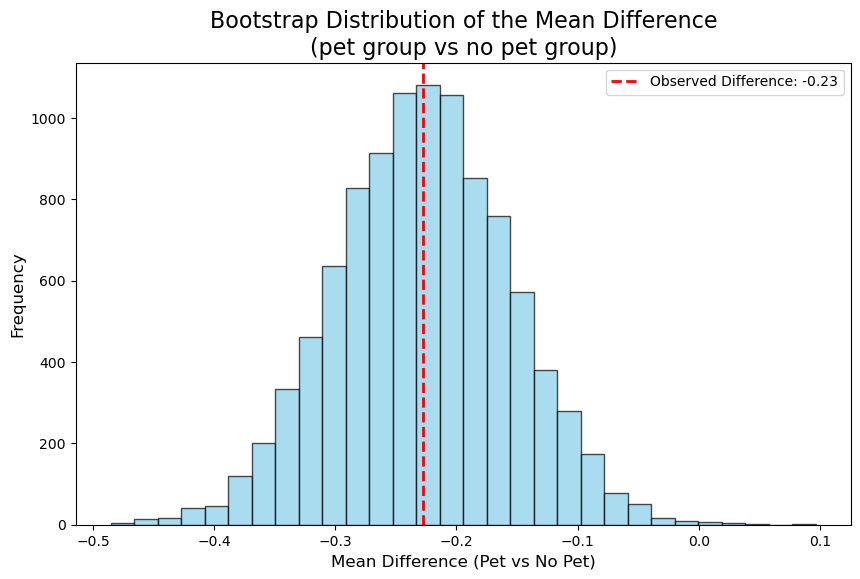

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


url = 'https://raw.githubusercontent.com/Abhi07cs07/Sta130HW/refs/heads/main/cleaned_dataset2%20(7).csv'
df = pd.read_csv(url)

df['has_pet'] = df['Pet_or_no'].apply(lambda x: 1 if x == 'yes' else 0)

pet_group = df[df['has_pet'] == 1]['LONELY_ucla_loneliness_scale_score'].dropna()
no_pet_group = df[df['has_pet'] == 0]['LONELY_ucla_loneliness_scale_score'].dropna()

observed_diff = pet_group.mean() - no_pet_group.mean()
print(f"Observed Difference: {observed_diff}")

np.random.seed(130)
n_iterations = 10000
bootstrap_diffs = []

for _ in range(n_iterations):
    pet_sample = pet_group.sample(n=len(pet_group), replace=True)
    no_pet_sample = no_pet_group.sample(n=len(no_pet_group), replace=True)
    diff = pet_sample.mean() - no_pet_sample.mean()
    bootstrap_diffs.append(diff)

bootstrap_diffs = np.array(bootstrap_diffs)

p_value = np.mean(np.abs(bootstrap_diffs) >= np.abs(observed_diff))
print(f"p-value: {p_value}")
print(f"Pet Group Mean: {pet_group.mean()}")
print(f"No Pet Group Mean: {no_pet_group.mean()}")

plt.figure(figsize=(10, 6))
plt.hist(bootstrap_diffs, bins=30, edgecolor='k', color='skyblue', alpha=0.7)
plt.axvline(observed_diff, color='red', linestyle='dashed', linewidth=2, label=f'Observed Difference: {observed_diff:.2f}')
plt.title('Bootstrap Distribution of the Mean Difference\n(pet group vs no pet group)', fontsize=16)
plt.xlabel('Mean Difference (Pet vs No Pet)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()


All loneliness scores are within the range of 1 to 9.
Group 1 mean (low CONNECTION_activities_talked_day_p3m): 5.60
Group 2 mean (high CONNECTION_activities_talked_day_p3m): 5.44
t-statistic: 2.36
p-value: 0.0183
Reject the null hypothesis: There is a significant difference in loneliness scores between the groups.


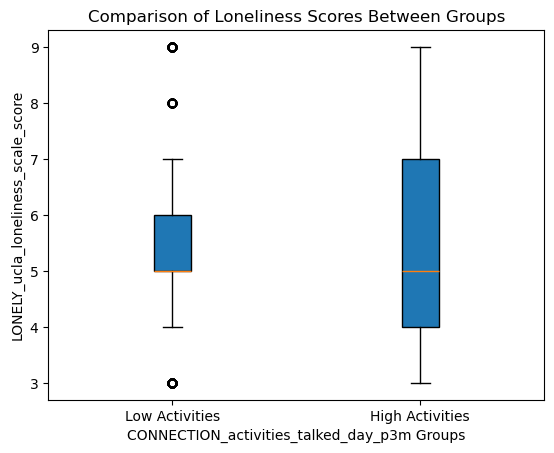

In [26]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/Abhi07cs07/Sta130HW/main/cleaned_dataset2%20(7).csv"
data = pd.read_csv(url)

# Variables of interest
x_column = 'CONNECTION_activities_talked_day_p3m'
y_column = 'LONELY_ucla_loneliness_scale_score'

# Map categorical values to numerical
frequency_mapping = {
    'Daily or almost daily': 7,
    'A few times a week': 6,
    'Weekly': 5,
    'A few times a month': 4,
    'Monthly': 3,
    'Less than monthly': 2,
    'Not in the past three months': 1
}
data[x_column] = data[x_column].map(frequency_mapping)

# Drop rows with missing values
data_filtered = data[[x_column, y_column]].dropna()

# Check if loneliness score is within range 1-9
if data_filtered[y_column].between(1, 9).all():
    print("All loneliness scores are within the range of 1 to 9.")
else:
    print("Warning: Loneliness scores are out of the expected range!")

# Divide into two groups based on median of CONNECTION_activities_talked_day_p3m
median_value = data_filtered[x_column].median()
group1 = data_filtered[data_filtered[x_column] <= median_value][y_column]
group2 = data_filtered[data_filtered[x_column] > median_value][y_column]

# Perform an independent two-sample t-test
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Welch's t-test

# Print results
print(f"Group 1 mean (low {x_column}): {group1.mean():.2f}")
print(f"Group 2 mean (high {x_column}): {group2.mean():.2f}")
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.4f}")

# Conclusion
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in loneliness scores between the groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in loneliness scores between the groups.")

# Visualization
plt.boxplot([group1, group2], labels=['Low Activities', 'High Activities'], patch_artist=True)
plt.title('Comparison of Loneliness Scores Between Groups')
plt.ylabel('LONELY_ucla_loneliness_scale_score')
plt.xlabel(f'{x_column} Groups')
plt.show()


All loneliness scores are within the range of 1 to 9.
Group 1 mean (low exercise frequency): 5.59
Group 2 mean (high exercise frequency): 5.30
P-value from bootstrapping: 0.0003


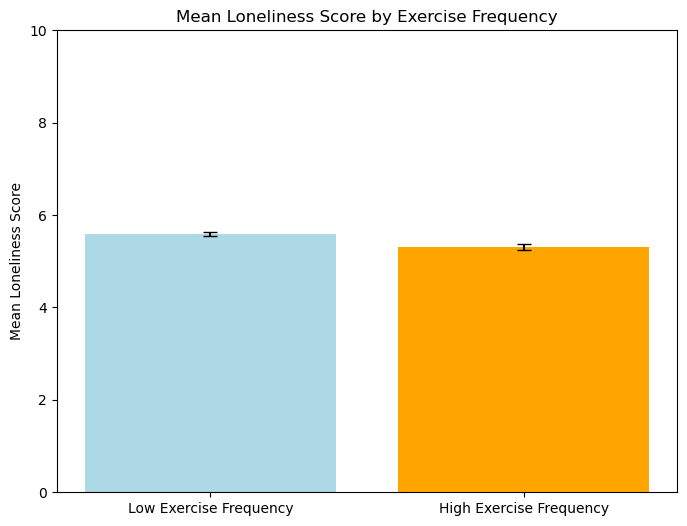

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/Abhi07cs07/Sta130HW/main/cleaned_dataset2%20(7).csv"
df = pd.read_csv(url)

# Check and clean the relevant columns
df = df[['CONNECTION_activities_group_exercise_p3m', 'LONELY_ucla_loneliness_scale_score']].dropna()

# Group data based on exercise frequency
low_exercise = df[df['CONNECTION_activities_group_exercise_p3m'].isin(['Not in the past three months', 'Less than monthly','Monthly','A few times a month'])]['LONELY_ucla_loneliness_scale_score']
high_exercise = df[df['CONNECTION_activities_group_exercise_p3m'].isin(['Weekly', 'A few times a week','Daily or almost daily'])]['LONELY_ucla_loneliness_scale_score']

# Calculate group means
mean_low = low_exercise.mean()
mean_high = high_exercise.mean()

# Bootstrapping for p-value
n_bootstraps = 10000
observed_diff = mean_high - mean_low
bootstrap_diffs = []

combined = np.concatenate([low_exercise, high_exercise])
for _ in range(n_bootstraps):
    np.random.shuffle(combined)
    bootstrap_low = combined[:len(low_exercise)]
    bootstrap_high = combined[len(low_exercise):]
    bootstrap_diffs.append(np.mean(bootstrap_high) - np.mean(bootstrap_low))

p_value = (np.sum(np.abs(bootstrap_diffs) >= np.abs(observed_diff)) / n_bootstraps)

# Print results
print("All loneliness scores are within the range of 1 to 9.")
print(f"Group 1 mean (low exercise frequency): {mean_low:.2f}")
print(f"Group 2 mean (high exercise frequency): {mean_high:.2f}")
print(f"P-value from bootstrapping: {p_value:.4f}")

# Visualization
# Calculate standard error for error bars
std_low = low_exercise.std() / (len(low_exercise) ** 0.5)
std_high = high_exercise.std() / (len(high_exercise) ** 0.5)

# Create bar plot
plt.figure(figsize=(8, 6))
group_means = [mean_low, mean_high]
group_errors = [std_low, std_high]

plt.bar(['Low Exercise Frequency', 'High Exercise Frequency'], group_means, yerr=group_errors, capsize=5, color=['lightblue', 'orange'])
plt.ylabel('Mean Loneliness Score')
plt.title('Mean Loneliness Score by Exercise Frequency')
plt.ylim(0, 10)
plt.show()
